In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)
import numpy as np

In [2]:
from __future__ import print_function
import time, os, glob
import ROOT
from array import array
from hist_utils import *
from trigger_systs import getTrgSF2016
import CMS_lumi

Welcome to JupyROOT 6.20/02


In [3]:
def make_pdf(h):

    sumOverY = {}
    for ix in range(1, h.GetNbinsX()+1):
        sumOverY[ix] = sum([h.GetBinContent(ix, iy_) for iy_ in range(1, h.GetNbinsY()+1)])
        for iy in range(1, h.GetNbinsY()+1):
            binc = h.GetBinContent(ix, iy)
            if sumOverY[ix] > 0.:
                h.SetBinContent(ix, iy, binc/sumOverY[ix])

    return h

In [4]:
year = '2016'
#year = '2017'
#year = '2018'
kdata = 'data%s_hgg'%year
#kdata = 'bg%s-dy_hgg'%year
#kmc = 'bg%s-dy_h4g'%year
kmc = 'data%s_h4g'%year
samples = [kdata, kmc]
#samples = ['data2017']
#ma, wgt = {}, {}
ma, pt, eta, r9, pu = {}, {}, {}, {}, {}
order = {}
eta_range = 'cntr'
eta_range = 'mid'
eta_range = 'fwd'
eta_range = None
#era = 'ZeeSel-Era16Feb2021-Zeev1' #massreg paper only
#era = 'ZeeSel-Era16Feb2021-Zeev2' #h4g
era = {}
era[kmc] = 'ZeeSel-Era16Feb2021-Zeev3' #h4g + r9 for SFs
era[kdata] = 'ZeeSel-Era16Feb2021-Zeev4' #hgg + r9 for SFs

#fma.write('%f:%f:%f:%f\n'%(tree.ma[idx], tree.phoCalibEt[idx], tree.phoEta[idx], pu_))
print('>> Doing |eta| range:',eta_range)

for s in samples:
    print('>> For sample:',s)
    
    if 'data' in s:
        in_files = glob.glob('Templates/%s/%s-Run%s*_ma1.txt'%(era[s], s.split('_')[0], year))
    else:
        in_files = glob.glob('Templates/%s/%s*_ma1.txt'%(era[s], s.split('_')[0]))

    print('>> input files:')
    for in_file in in_files:
        print('   .. input file:',in_file)
    
    #'''
    ma[s], pt[s], eta[s], r9[s], pu[s] = [], [], [], [], []
    order[s] = []
    for in_file in in_files:
        f = open(in_file, "r")
        for i,l in enumerate(f):
            ma_, pt_, eta_, r9_, order_, pu_ = l.replace('\n','').split(':')
            eta_ = float(eta_)
            if eta_range == 'cntr':
                if abs(eta_) > 0.5: continue
            elif eta_range == 'mid':
                if abs(eta_) <= 0.5 or abs(eta_) > 1.00: continue
            elif eta_range == 'fwd':
                if abs(eta_) <= 1.0 or abs(eta_) > 1.44: continue
            ma[s].append(float(ma_))
            pt[s].append(float(pt_))
            eta[s].append(float(eta_))
            r9[s].append(float(r9_))
            order[s].append(float(order_ if order_ <=1 else 1))
            pu[s].append(float(pu_))
            #if i >= 100000: break
            #if len(ma[s]) >= 1000000: break

    ma[s] = np.array(ma[s])
    pt[s] = np.array(pt[s])
    eta[s] = np.array(eta[s])
    r9[s] = np.array(r9[s])
    order[s] = np.array(order[s])
    pu[s] = np.array(pu[s])
    
    #pt[s] = pt[s][ma[s] > -0.2]
    #ma[s] = ma[s][ma[s] > -0.2]
    assert len(ma[s] == pt[s])
    print('   .. N_e:',len(ma[s]))
    print('   .. ma[:5]:',ma[s][:5])
    print('   .. pt[:5]:',pt[s][:5])
    print('   .. r9[:5]:',r9[s][:5])
    print('   .. order[:5]:',order[s][:5])
    #'''

>> Doing |eta| range: None
>> For sample: data2016_hgg
>> input files:
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev4/data2016-Run2016B_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev4/data2016-Run2016C_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev4/data2016-Run2016D_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev4/data2016-Run2016E_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev4/data2016-Run2016F_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev4/data2016-Run2016G_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev4/data2016-Run2016H_ma1.txt
   .. N_e: 17565801
   .. ma[:5]: [-9.2165e-02  1.0800e-04 -1.0943e-02 -1.0000e+00 -5.8331e-02]
   .. pt[:5]: [61.398411 38.187515 32.817593 32.973209 42.675934]
   .. r9[:5]: [0.967423 0.977963 0.660653 0.950761 0.942783]
   .. order[:5]: [1. 1. 1. 1. 1.]
>> For sample: data2016_h4g
>> input files:
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev3/data2016-Run20

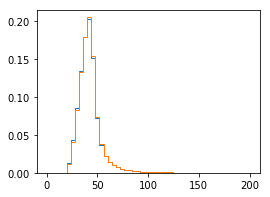

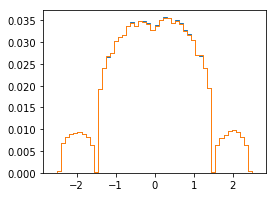

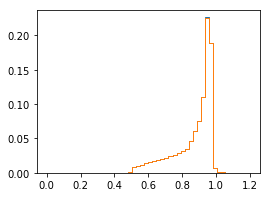

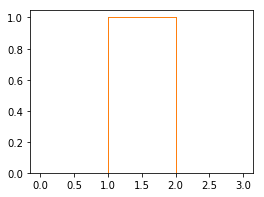

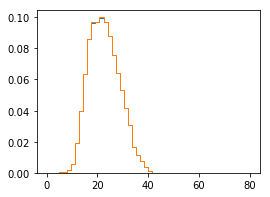

50.6198 50.6198


In [5]:
plt.rcParams["figure.figsize"] = (4,3)

plt.hist(pt[kdata], histtype='step', bins=50, range=(0., 200.), weights=np.ones_like(pt[kdata])/len(pt[kdata]))
plt.hist(pt[kmc], histtype='step', bins=50, range=(0., 200.), weights=np.ones_like(pt[kmc])/len(pt[kmc]))
plt.show()

plt.hist(eta[kdata], histtype='step', bins=50, range=(-2.6, 2.6), weights=np.ones_like(eta[kdata])/len(eta[kdata]))
plt.hist(eta[kmc], histtype='step', bins=50, range=(-2.6, 2.6), weights=np.ones_like(eta[kmc])/len(eta[kmc]))
plt.show()

plt.hist(r9[kdata], histtype='step', bins=50, range=(0., 1.2), weights=np.ones_like(r9[kdata])/len(r9[kdata]))
plt.hist(r9[kmc], histtype='step', bins=50, range=(0., 1.2), weights=np.ones_like(r9[kmc])/len(r9[kmc]))
plt.show()

plt.hist(order[kdata], histtype='step', bins=3, range=(0., 3.), weights=np.ones_like(order[kdata])/len(order[kdata]))
plt.hist(order[kmc], histtype='step', bins=3, range=(0., 3.), weights=np.ones_like(order[kmc])/len(order[kmc]))
plt.show()

plt.hist(pu[kdata], histtype='step', bins=50, range=(0., 80.), weights=np.ones_like(pu[kdata])/len(pu[kdata]))
plt.hist(pu[kmc], histtype='step', bins=50, range=(0., 80.), weights=np.ones_like(pu[kmc])/len(pu[kmc]))
plt.show()

print(pu[kdata].max(), pu[kmc].max())

In [6]:
pt_bins_ = {}
pt_bins_[0] = [10]
pt_bins_[1] = np.arange(20, 90, 2)
pt_bins_[2] = np.arange(90, 140, 10)
pt_bins_[3] = np.arange(140, 180, 20)
pt_bins_[4] = np.arange(180, 1500+1320, 1320)
#pt_bins_[4] = np.arange(500, 1500+1000, 1000)
pt_bins = [pt_bins_[i] for i in pt_bins_]
pt_bins = np.concatenate(pt_bins).flatten()
pt_bins
#print(pt['data2017'].max())

array([  10,   20,   22,   24,   26,   28,   30,   32,   34,   36,   38,
         40,   42,   44,   46,   48,   50,   52,   54,   56,   58,   60,
         62,   64,   66,   68,   70,   72,   74,   76,   78,   80,   82,
         84,   86,   88,   90,  100,  110,  120,  130,  140,  160,  180,
       1500])

In [22]:
# getTrgSF2016(r9, abs_eta, pt, order, year, shift)
def get_sf(pt, sceta, h, shift='nom'):

    #pt = tree.phoEt[preselIdx]
    #sceta = tree.phoSCEta[preselIdx]

    ieta = h.GetXaxis().FindBin(sceta)
    ipt = h.GetYaxis().FindBin(pt)
    sf = h.GetBinContent(ieta, ipt)
    sf = sf if (sf > 0.) and (sf < 10.) else 1.

    if shift == 'nom':
        pass
        #sf = sf
    elif shift == 'up':
        sf += h.GetBinError(ieta, ipt)
    elif shift == 'dn':
        sf -= h.GetBinError(ieta, ipt)
    else:
        raise Exception('Unknown pho ID SF shift: %s'%shift)

    #print(preselIdx, pt, sceta, sf)
    return sf

fsf = ROOT.TFile('SF/SF2016_egammaEffi.txt_EGM2D.root', "READ")
hsf = fsf.Get('EGamma_SF2D')

apply_phoIdSF = False
apply_phoIdSF = True

apply_trgSF = False
#apply_trgSF = True

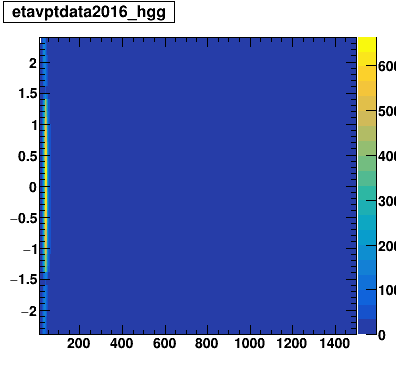

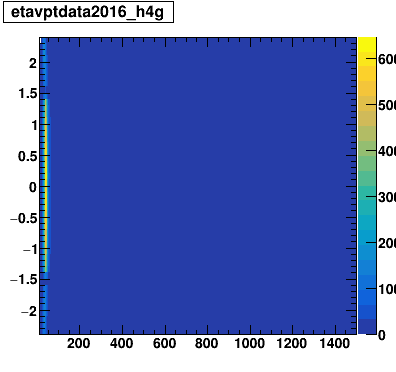

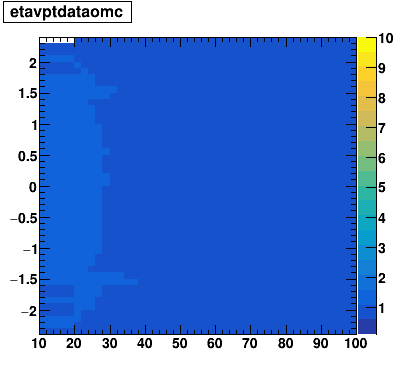

In [23]:
#'''
h, c = {}, {}

eta_edge = 2.4
#pt_lo, pt_hi = 20., 200.

s = kdata
k = 'etavpt'+s
#h[k] = ROOT.TH2F(k, k, 50, pt_lo, pt_hi, 48, -eta_edge, eta_edge)
h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
i = 0
for p,e in zip(pt[s], eta[s]):
    h[k].Fill(p, e)
    i += 1
    #if i > 10000: break
h[k].Draw('COL Z')
c[k].Draw()

s = kmc
k = 'etavpt'+s
#h[k] = ROOT.TH2F(k, k, 50, pt_lo, pt_hi, 48, -eta_edge, eta_edge)
h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
i = 0
#for p,e in zip(pt[s], eta[s]):
for i in range(len(pt[s])):
    p = pt[s][i]
    e = eta[s][i]
    r = r9[s][i]
    o = order[s][i]
    w = 1.
    if apply_phoIdSF:
        w *= get_sf(p, e, hsf, shift='nom')
    if apply_trgSF:
        w *= getTrgSF2016(r, e, p, order=o, year='2016', shift='nom')
    h[k].Fill(p, e, w)
    #h[k].Fill(p, e)
    #print('wgt:',w)
    i += 1
    #if i > 10: break
h[k].Draw('COL Z')
c[k].Draw()
#'''
#'''
k = 'etavptdataomc'
#h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
h[k] = h['etavpt%s'%kdata].Clone()
h[k].SetName(k)
h[k].SetTitle(k)
h[k].Divide(h['etavpt%s'%kmc])
h[k].GetXaxis().SetRangeUser(10., 100.)
h[k].SetMaximum(10.)
h[k].SetMinimum(1./10.)
h[k].Draw('COL Z')
c[k].Draw()
#'''

In [24]:
def get_ptetawgt(pt_, eta_, h, ceil=10.):

    ipt_  = h.GetXaxis().FindBin(pt_)
    ieta_ = h.GetYaxis().FindBin(eta_)
    wgt = h.GetBinContent(ipt_, ieta_)
    if wgt > ceil:
        wgt = ceil

    return wgt

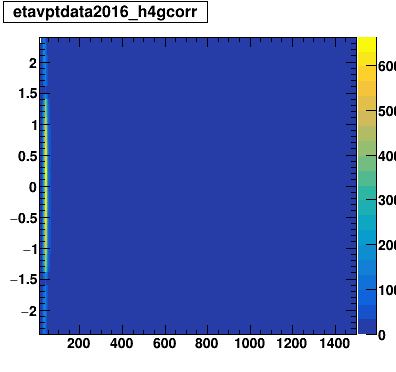

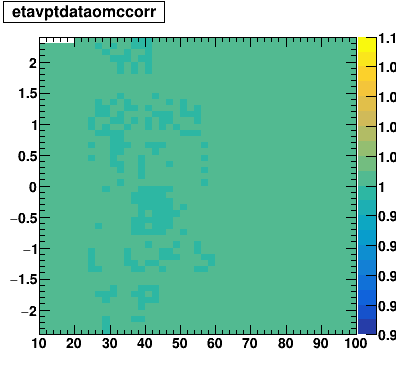

In [25]:
s = kmc
k = 'etavpt'+s+'corr'
#h[k] = ROOT.TH2F(k, k, 50, pt_lo, pt_hi, 48, -eta_edge, eta_edge)
h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
i = 0
#for p,e in zip(pt[s], eta[s]):
for i in range(len(pt[s])):
    p = pt[s][i]
    e = eta[s][i]
    r = r9[s][i]
    o = order[s][i]
    w = 1.
    if apply_phoIdSF:
        w *= get_sf(p, e, hsf, shift='nom')
    if apply_trgSF:
        w *= getTrgSF2016(r, e, p, order=o, year='2016', shift='nom')
    w *= get_ptetawgt(p, e, h['etavptdataomc'])
    #print('wgt:',w)
    h[k].Fill(p, e, w)
    #h[k].Fill(p, e, get_ptetawgt(p,e,h['etavptdataomc']))
    #h[k].Fill(p, e)
    i += 1
    #if i > 10: break
h[k].Draw('COL Z')
c[k].Draw()
#'''
#'''
k = 'etavptdataomc'+'corr'
#h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
h[k] = h['etavpt%s'%kdata].Clone()
h[k].SetName(k)
h[k].SetTitle(k)
h[k].Divide(h['etavpt%scorr'%kmc])
h[k].GetXaxis().SetRangeUser(10., 100.)
h[k].SetMaximum(1.+0.1)
h[k].SetMinimum(1.-0.1)
h[k].Draw('COL Z')
c[k].Draw()
#'''

15091725.017
1004.90789795
15087049.0
1009.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: data2016_h4gnopucorr


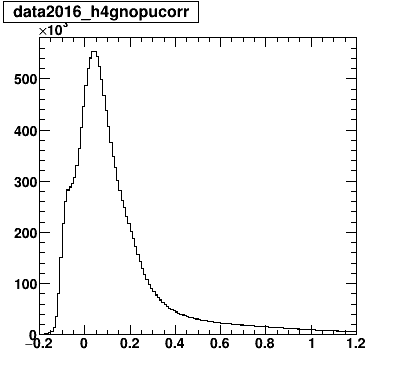

In [26]:
#h, c = {}, {}

#dM = 25
dM = 10
#dM = 100
ma_bins = np.arange(0,1400+dM,dM)-200
#ma_bins = np.arange(150,350+dM,dM)-200
#ma_bins = list(range(0,1200+dM,dM))
#ma_bins = [-400]+ma_bins
#ma_bins = [-400, -200]+ma_bins
ma_bins = [float(m)/1.e3 for m in ma_bins]
#print(len(ma_bins))
n_ma_bins = len(ma_bins)-1
ma_bins = array('d', ma_bins)
#print(ma_bins)

k = kmc+'nopucorr'
#h[k] = ROOT.TH1F(k, k, 48, 0., 1.2)
#h[k] = ROOT.TH1F(k, k, 56, -0.2, 1.2)
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
c[k] = ROOT.TCanvas(k, k, 400, 400)
kpu = k+'pu'
h[kpu] = ROOT.TH1F(kpu, kpu, 20, 0., 100.)
#for i,m in enumerate(ma[kmc]):
for i in range(len(ma[kmc])):
    p = pt[kmc][i]
    e = eta[kmc][i]
    r = r9[kmc][i]
    m = ma[kmc][i]
    o = order[kmc][i]
    w = 1.
    if apply_phoIdSF:
        w *= get_sf(p, e, hsf, shift='nom')
    if apply_trgSF:
        w *= getTrgSF2016(r, e, p, order=o, year='2016', shift='nom')
    w *= get_ptetawgt(p, e, h['etavptdataomc'])
    #print('wgt:',w)
    #w = get_ptetawgt(pt[kmc][i], eta[kmc][i], h['etavptdataomc'])
    h[k].Fill(m, w)
    h[kpu].Fill(pu[kmc][i], w)
    #if i > 10: break
h[k].Draw("hist")
c[k].cd()
c[k].Draw()
print(h[k].Integral())
print(h[k].GetBinContent(1))

k = kdata
#h[k] = ROOT.TH1F(k, k, 48, 0., 1.2)
#h[k] = ROOT.TH1F(k, k, 56, -0.2, 1.2)
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
#c[k] = ROOT.TCanvas(k, k, 600, 400)
kpu = k+'pu'
h[kpu] = ROOT.TH1F(kpu, kpu, 20, 0., 100.)
for i,m in enumerate(ma[k]):
    #if i+1 >= 100000: break
    h[k].Fill(m)
    h[kpu].Fill(pu[k][i])
#h[k].Draw("hist")
h[k].Draw("hist same")
#c[k].Draw()
print(h[k].Integral())
print(h[k].GetBinContent(1))

In [27]:
print(h[kdata].GetMaximum())
print(h[kdata].GetMaximumBin())
print(h[kdata].GetXaxis().FindBin(0.))
print(ma_bins)
print(ma_bins[21-1])
print(ma_bins[25-1])
print(ma_bins[25+4-1])
print(ma_bins[10:34])

553753.0
24
21
array('d', [-0.2, -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2])
0.0
0.04
0.08
array('d', [-0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.0

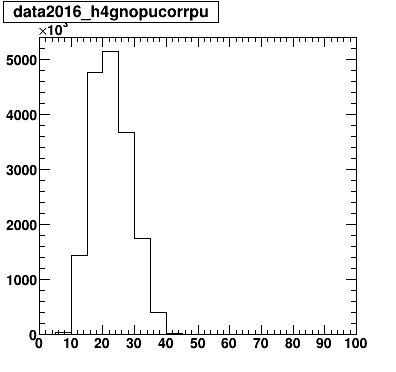

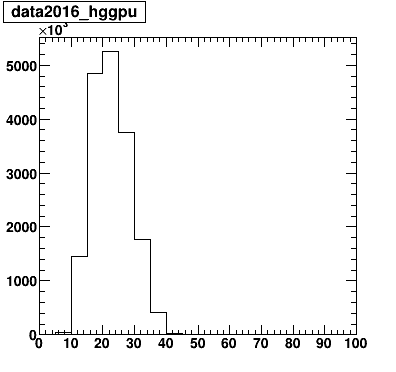

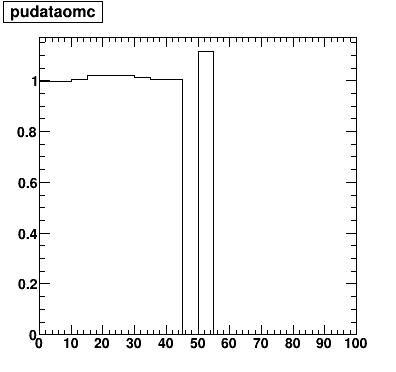

In [28]:
k = kmc+'nopucorr'
kpu = k+'pu'
c[kpu] = ROOT.TCanvas(kpu, kpu, 400, 400)
h[kpu].Draw("hist")
c[kpu].Draw()

k = kdata
kpu = k+'pu'
c[kpu] = ROOT.TCanvas(kpu, kpu, 400, 400)
h[kpu].Draw("hist")
c[kpu].Draw()

k = 'pudataomc'
c[k] = ROOT.TCanvas(k, k, 400, 400)
h[k] = h['%spu'%kdata].Clone()
h[k].SetName(k)
h[k].SetTitle(k)
h[k].Divide(h[kmc+'nopucorr'+'pu'])
h[k].Draw('hist')
c[k].Draw()

In [29]:
def get_puwgt(pu_, h):
    ipu_ = h.GetXaxis().FindBin(pu_)
    wgt = h.GetBinContent(ipu_)
    return wgt

In [30]:
hdata, _ = np.histogram(ma[kdata], bins=ma_bins)
print(hdata.sum())

#dywgts_pteta_pu = [get_ptetawgt(pt[kmc][i], eta[kmc][i], h['etavptdataomc'])*get_puwgt(pu[kmc][i], h['pudataomc']) for i,_ in enumerate(ma[kmc])]
dywgts_pteta_pu = []

for i in range(len(ma[kmc])):
    p = pt[kmc][i]
    e = eta[kmc][i]
    r = r9[kmc][i]
    m = ma[kmc][i]
    o = order[kmc][i]
    w = 1.
    if apply_phoIdSF:
        w *= get_sf(p, e, hsf, shift='nom')
    if apply_trgSF:
        w *= getTrgSF2016(r, e, p, order=o, year='2016', shift='nom')
    w *= get_ptetawgt(p, e, h['etavptdataomc'])
    w *= get_puwgt(pu[kmc][i], h['pudataomc'])
    dywgts_pteta_pu.append(w)

dywgts_pteta_pu = np.array(dywgts_pteta_pu)
assert len(dywgts_pteta_pu) == len(ma[kmc])
print(len(dywgts_pteta_pu), len(ma[kmc]))
print(np.sqrt(np.mean(dywgts_pteta_pu*dywgts_pteta_pu)))
# false, false: 2.219906830258407
# true, true: 2.220086606655946

15087049
17085983 17085983
1.046911119519886


In [31]:
plt.rcParams["figure.figsize"] = (4,3)

def get_chisq(data, mc):
    #assert np.floor(data.sum()) == np.floor(mc.sum()), 'data:%f vs mc:%f'%(np.floor(data.sum()), np.floor(mc.sum()))
    chisq = (data - mc)**2.
    chisq = chisq/data
    chisq = chisq.sum()#/len(mc)-1
    return chisq

#def get_KS(data, mc, do_trunc=True):
def get_tests(data, mc, it):
    #print(data[:34])
    #print(mc[:34])
    assert data.sum()-mc.sum() < 1.
    #print(data.sum(), mc.sum())
    data = np.float32(data)/data.sum()
    mc = np.float32(mc)/mc.sum()
    
    chisq = get_chisq(data, mc)
    sumabs = np.sum(np.abs(data-mc))
    ks = np.max(np.abs(np.cumsum(data)-np.cumsum(mc)))
    #'''
    #print('sum abs(diff): %E'%np.sum(np.abs(data-mc)))
    #print('chisq: %E'%chisq)
    #print('KS: %E'%np.max(np.abs(np.cumsum(data)-np.cumsum(mc))))
    #for i,m in enumerate(ma_bins):
    #    #print(i, m, data[i], mc[i], data[i]-mc[i])
    #    if i >= 34: break
    #if do_trunc:
    data = data[10:34+1]
    mc = mc[10:34+1]
    #data = np.float32(data)/data.sum()
    #mc = np.float32(mc)/mc.sum()
    #for i,m in enumerate(ma_bins):
    #    if i+10 >= 34: break
    #    print(i+10, ma_bins[i+10], data[i], mc[i], np.abs(data[i]-mc[i]))
    if it == 0:
        plt.plot(data, label='data')
        plt.plot(mc, label='mc')
        plt.legend()
        plt.show()
    #print('sum abs(diff), trunc: %E'%np.sum(np.abs(data-mc)))
    #print('chisq, trunc: %E'%get_chisq(data, mc))
    #print(np.abs(data-mc))
    #data = np.cumsum(data)
    #mc = np.cumsum(mc)
    #print(data[-1], mc[-1])
    #print(np.abs(data-mc))
    #return np.max(np.abs(data-mc))
    #print('KS, trunc: %E'%np.max(np.abs(np.cumsum(data)-np.cumsum(mc))))
    #'''
    chisq_trunc = get_chisq(data, mc)
    sumabs_trunc = np.sum(np.abs(data-mc))
    ks_trunc = np.max(np.abs(np.cumsum(data)-np.cumsum(mc)))
    return [chisq, sumabs, ks, chisq_trunc, sumabs_trunc, ks_trunc]

def shift_ma(scale, smear, it):
    if smear == 0.:
        ma_ = scale*ma[kmc]
    else:
        #ma_ = scale*np.array([np.random.normal(m, smear) for m in ma[kmc]])
        ma_ = np.array([np.random.normal(scale*m, smear) for m in ma[kmc]])
    hmc_shift, _ = np.histogram(ma_, bins=ma_bins, weights=dywgts_pteta_pu)
    hmc_shift = np.float64(hmc_shift)
    #hmc_shift *= (h['Run2017'].Integral()/hmc_shift.sum())
    hmc_shift *= (hdata.sum()/hmc_shift.sum())
    #return get_chisq(hdata, hmc_shift)
    #return get_KS(hdata, hmc_shift)
    return get_tests(hdata, hmc_shift, it)

In [32]:
# Do grid search

do_coarse = True
#do_coarse = False

dS = 2
#dS = 4
steps = np.arange(dS,2*dS+dS,dS)/1.e3
if do_coarse:
    scale_nom = 1.
    smear_nom = 0.
    #scales_ = np.concatenate([[-0.004], np.arange(0,56+4,4)/1.e3])
    #smears_ = np.concatenate([np.arange(0,20+4,4)/1.e3])
    scales_ = np.concatenate([[-0.036, -0.032, -0.028, -0.024, -0.020, -0.016, -0.012, -0.008, -0.004], np.arange(0,0+4,4)/1.e3])#8+4
    #scales_ = np.concatenate([[-0.008, -0.004], np.arange(0,12+4,4)/1.e3])#8+4
    smears_ = np.concatenate([np.arange(0,20+4,4)/1.e3])
    scales_ = []
    smears_ = []
else:
    scale_nom = 0.992 # use values from coarse scan
    smear_nom = 0.008 # use values from coarse scan
    scales_ = np.concatenate([-np.flip(steps), [0.], steps])
    smears_ = np.concatenate([-np.flip(steps), [0.], steps])

smears_ = np.array([sm for sm in smears_ if smear_nom+sm >= 0.]) # only allow positive smearing
chisqs_ = np.zeros((len(scales_), len(smears_)))
chisqtruncs_ = np.zeros((len(scales_), len(smears_)))
chisqs_stdev_ = np.zeros((len(scales_), len(smears_)))
chisqtruncs_stdev_ = np.zeros((len(scales_), len(smears_)))

n = 0
for a,s in enumerate(scales_):
    for b,sm in enumerate(smears_):
        n += 1
        #if n < 210: continue
        print('=======================')
        print('iteration:',n)
        scale = scale_nom + s
        smear = smear_nom + sm
        print('scale:',scale)
        print('smear:',smear)
        #'''
        #ks_test = [shift_ma(scale, smear) for i in range(10)]
        #print('chisq: %E +/- %E'%(np.mean(ks_test),np.std(ks_test)))
        tests = np.array([shift_ma(scale, smear, i) for i in range(1 if do_coarse else 2)])
        #print(tests.shape)
        print('chisq:  %E +/- %E'%(np.mean(tests[:,0]),np.std(tests[:,0])))
        print('sumabs: %E +/- %E'%(np.mean(tests[:,1]),np.std(tests[:,1])))
        print('ks:     %E +/- %E'%(np.mean(tests[:,2]),np.std(tests[:,2])))
        print('-----------------------')
        print('chisq, trunc:  %E +/- %E'%(np.mean(tests[:,3]),np.std(tests[:,3])))
        print('sumabs, trunc: %E +/- %E'%(np.mean(tests[:,4]),np.std(tests[:,4])))
        print('ks, trunc:     %E +/- %E'%(np.mean(tests[:,5]),np.std(tests[:,5])))
        chisqs_[a,b] = np.mean(tests[:,0])
        chisqtruncs_[a,b] = np.mean(tests[:,3])
        chisqs_stdev_[a,b] = np.std(tests[:,0])
        chisqtruncs_stdev_[a,b] = np.std(tests[:,3])
        print()
        #'''
        #break
    #break
print('>> Done.')

>> Done.


15356679.0569
15087049.0
1022.90808105


Warning in <TCanvas::Constructor>: Deleting canvas with same name: data2016_h4g


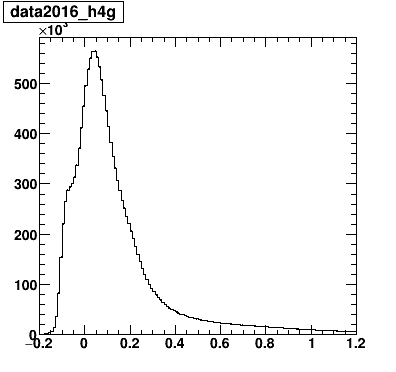

In [33]:
k = kmc
scale_ = 1. #0.992
smear_ = 0. #GeV
kshift = k+'shift'
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
h[kshift] = ROOT.TH1F(kshift, kshift, n_ma_bins, ma_bins)
c[k] = ROOT.TCanvas(k, k, 400, 400)
#for i,m in enumerate(ma[k]):
for i in range(len(ma[k])):
    p = pt[k][i]
    e = eta[k][i]
    r = r9[k][i]
    m = ma[k][i]
    o = order[k][i]
    w = 1.
    if apply_phoIdSF:
        w *= get_sf(p, e, hsf, shift='nom')
    if apply_trgSF:
        w *= getTrgSF2016(r, e, p, order=o, year='2016', shift='nom')
    w *= get_ptetawgt(p, e, h['etavptdataomc'])
    w *= get_puwgt(pu[k][i], h['pudataomc'])
    h[k].Fill(m, w)
    h[kshift].Fill(scale_*np.random.normal(m, smear_), w)
h[k].Draw("hist")
h[kshift].Draw('same')
c[k].cd()
c[k].Draw()
print(h[k].Integral())
print(h[kdata].Integral())
print(h[k].GetBinContent(1))

In [34]:
def get_stat_syst_graph(h, k, kshift, ksyst, scale=1.):

    for ib in range(1, h[k].GetNbinsX()+1):
        binc_nom = h[k].GetBinContent(ib)
        binc_shift = h[kshift].GetBinContent(ib)

        binerr_syst = binc_nom - binc_shift
        binerr_stat = h[k].GetBinError(ib)

        if binc_nom > binc_shift:
            binerr_up = binerr_stat
            binerr_dn = scale*np.sqrt(binerr_stat*binerr_stat + binerr_syst*binerr_syst)
        else:
            binerr_up = scale*np.sqrt(binerr_stat*binerr_stat + binerr_syst*binerr_syst)
            binerr_dn = binerr_stat

        if ib <= 2: print(ib, h[k].GetBinCenter(ib), binc_nom, binerr_stat, binerr_syst, ib-1, binerr_up, binerr_dn)
        h[ksyst].SetPoint(ib-1, h[k].GetBinCenter(ib), binc_nom)
        h[ksyst].SetPointError(
            ib-1,
            h[k].GetBinWidth(ib)/2.,
            h[k].GetBinWidth(ib)/2.,
            binerr_dn,
            binerr_up
            )

max: 0.0367041938007
1 -0.195 6.66099804221e-05 2.12456959354e-06 0.0 0 2.1245695935380286e-06 2.12456959354e-06
2 -0.185 8.97872232599e-05 2.46730255617e-06 0.0 1 2.4673025561679103e-06 2.46730255617e-06
13 TeV
0 6.66099804221e-05 6.44854108285e-05 6.87345500156e-05
1 8.97872232599e-05 8.73199207038e-05 9.22545258161e-05
2 0.000125253442093 0.00012233749775 0.000128169386436
3 0.000185948680155 0.000182395156379 0.000189502203931
4 0.000273948826361 0.000269637114458 0.000278260538265
1, data/mc: 1.004032
2, data/mc: 1.004707
3, data/mc: 0.993806
4, data/mc: 0.995218
5, data/mc: 0.999013
6, data/mc: 0.996692
7, data/mc: 1.001902
8, data/mc: 0.997030
9, data/mc: 0.997477
10, data/mc: 0.998506
11, data/mc: 0.998920
12, data/mc: 0.998972
13, data/mc: 0.999434
14, data/mc: 0.999480
15, data/mc: 1.000495
16, data/mc: 1.000344
17, data/mc: 1.000571
18, data/mc: 1.000797
19, data/mc: 1.000733
20, data/mc: 1.000691
21, data/mc: 1.000645
22, data/mc: 1.000732
23, data/mc: 1.000830
24, data/mc:

Info in <TCanvas::Print>: pdf file Plots/ZeeSel-Era16Feb2021-Zeev4_ZeeSel-Era16Feb2021-Zeev3/DYToEE_data2016_hggodata2016_h4g_ma1_ptetarwgt_scale1.000_smear0.000_phoidSF.pdf has been created


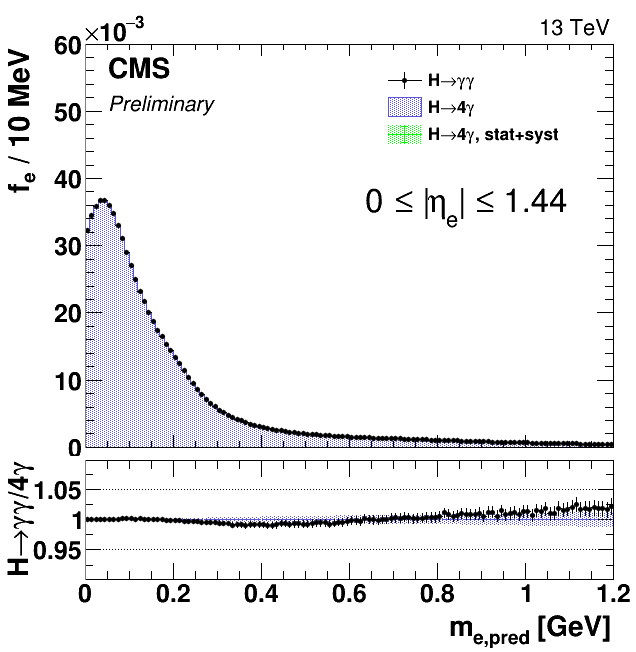

In [35]:
hc = {}

do_trunc = True
#do_trunc = False
data_on_data = True if ('data' in kdata) and ('data' in kmc) else False

ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Preliminary"
#CMS_lumi.lumi_sqrtS = "41.9 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
CMS_lumi.lumi_sqrtS = "13 TeV" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
iPos = 11
if( iPos==0 ): CMS_lumi.relPosX = 0.12
iPeriod = 0

err_style = 'E2'
fill_style = 3002
wd, ht = int(640*1), int(680*1)
ROOT.TGaxis.fgMaxDigits = 3
#ROOT.gStyle.SetErrorX(0)
#ROOT.gStyle.SetOptStat(0)

k = kdata
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)

pUp = ROOT.TPad("upperPad", "upperPad",.005, .300, .995, .995) # (,,Double_t xlow, Double_t ylow, Double_t xup, Double_t yup,...)
pDn = ROOT.TPad("lowerPad", "lowerPad",.005, .005, .995, .300)
pUp.Draw()
pDn.Draw()
pUp.SetMargin(13.e-02,3.e-02,2.e-02,9.e-02) # (Float_t left, Float_t right, Float_t bottom, Float_t top)
pDn.SetMargin(13.e-02,3.e-02,36.e-02,2.e-02) # (Float_t left, Float_t right, Float_t bottom, Float_t top)

pUp.cd()

# dummy hist for drawing axes
hdummy = h[k].Clone()
hdummy.Reset()
hdummy.SetName('dummy')
hdummy = set_hist(hdummy, "m_{e,pred} [GeV]", "f_{e}", "")
hdummy.GetYaxis().SetTitle('f_{e} / %d MeV'%dM)
hdummy.GetXaxis().SetTitle('')
hdummy.GetXaxis().SetLabelSize(0.)
hdummy.GetYaxis().SetTitleOffset(0.9)
hdummy.GetYaxis().SetTitleSize(0.07)
hdummy.GetYaxis().SetLabelSize(0.06)
hdummy.GetYaxis().SetMaxDigits(3)
hdummy.SetLineColor(0)
hdummy.Draw("hist")

# Plot MC
k = kmc
#if h[k].Integral() > 1.:
#    h[k].Scale(1./h[k].Integral())
if h[kdata].Integral() > 1.:
    h[kdata].Scale(1./h[kdata].Integral())
h[kmc].Scale(h[kdata].Integral()/h[kmc].Integral())
h[kshift].Scale(h[kdata].Integral()/h[kshift].Integral())
#h[k].Scale(1./h[kmc].GetEntries())
print('max:',h[k].GetMaximum())
# Plot total fill
hc[k] = h[k].Clone()
hc[k].SetName(k+'bulk')
hc[k].SetTitle(k+'bulk')
hc[k].SetLineColor(9)#11,3
hc[k].SetFillColor(9)#11,3
hc[k].SetFillStyle(fill_style)
hc[k].SetStats(0)
hc[k].Draw("hist same")
# Plot stat+syst uncert
ksyst = k+'_stat+systband'
h[ksyst] = ROOT.TGraphAsymmErrors()
h[ksyst].SetName(ksyst)
get_stat_syst_graph(h, k, kshift, ksyst) # set kshift=kdata to debug stat+syst ratio
h[ksyst].SetLineColor(3)
h[ksyst].SetFillColor(3)
h[ksyst].SetFillStyle(fill_style)
#h[ksyst].SetStats(0)
if do_trunc:
    h[ksyst].GetXaxis().SetRangeUser(0., 1.2)
h[ksyst].Draw("%s same"%err_style)
# Plot stat uncertainty
h[k].SetLineColor(9)
h[k].SetFillColor(9)
h[k].SetFillStyle(fill_style)
h[k].SetStats(0)
h[k].Draw("%s same"%err_style)

# Plot data
k = kdata
#if h[k].Integral() > 1.:
#    h[k].Scale(1./h[k].Integral())
#h[k].Scale(1./h[kdata].Integral())
hc[k] = h[k].Clone()
hc[k].SetName(kdata+'errs')
hc[k].SetFillStyle(0)
hc[k].SetMarkerStyle(20)
#hc[k].SetMarkerSize(0.85)
hc[k].SetMarkerSize(0.7)
hc[k].SetStats(0)
hc[k].Draw("E same")

#if ymax_ is None and hc[k].GetBinContent(2) > 0.:
ymax_lowbin = 1 if do_trunc else 2
if dM == 100:
    ymax = 6.e6
elif dM == 10:
    ymax = 6.e5
else:
    ymax = 1.3*max(np.max([hc[kdata].GetBinContent(ib) for ib in range(ymax_lowbin, hc[kdata].GetNbinsX()+2)]),
                   np.max([hc[kmc].GetBinContent(ib) for ib in range(ymax_lowbin, hc[kmc].GetNbinsX()+2)]))
#ymax = 6.e5 #dM=10
ymax = 4.e4
ymax = 1.2*h[kdata].GetMaximum()
#ymax = 8.e5
ymax = 0.05
ymax = 0.06
#hdummy.GetYaxis().SetRangeUser(0.1, ymax)
hdummy.GetYaxis().SetRangeUser(0., ymax)
if do_trunc:
    hdummy.GetXaxis().SetRangeUser(0., 1.2)
else:
    hdummy.GetXaxis().SetRangeUser(-0.2, 1.2)
ROOT.gPad.RedrawAxis()

l, l2, hatch = {}, {}, {}
legend = {}

hatch[k] = ROOT.TGraph(2, array('d',[0.,0.]), array('d',[0.,ymax]));
hatch[k].SetLineColor(14)
hatch[k].SetLineWidth(5001)
#hatch[k].SetLineWidth(5)
hatch[k].SetFillStyle(3004)
#hatch[k].SetFillColor(14)
hatch[k].SetFillColor(12)
#ROOT.gStyle.SetHatchesLineWidth(2)
hatch[k].Draw("same")

legend[k] = ROOT.TLegend(0.6,0.68,0.9,0.86) #(x1, y1, x2, y2)
'''
legend[k].AddEntry(kdata+'errs', "Data" if not data_on_data else kdata.replace('data',''), "lep")
legend[k].AddEntry(hc[kmc].GetName(), "MC" if not data_on_data else kmc.replace('data',''), "f")
#legend[k].AddEntry(h[kmc].GetName(), "%s, stat"%('MC' if not data_on_data else kmc.replace('data','')), "lef")
legend[k].AddEntry(h[ksyst].GetName(), "%s, stat+%s"%\
                                       ('MC' if not data_on_data else kmc.replace('data',''),\
                                        'ss' if data_on_data else 'syst'), "lef")
'''
legend[k].AddEntry(kdata+'errs', "H#rightarrow#gamma#gamma", "lep")
legend[k].AddEntry(hc[kmc].GetName(), "H#rightarrow4#gamma", "f")
legend[k].AddEntry(h[ksyst].GetName(), "H#rightarrow4#gamma, stat+syst", "lef")
legend[k].SetBorderSize(0)
legend[k].Draw("same")

if eta_range == 'cntr':
    etaText = '0 < |#eta_{e}| #leq 0.5'
elif eta_range == 'mid':
    etaText = '0.5 #leq |#eta_{e}| #leq 1.0'
elif eta_range == 'fwd':
    etaText = '1.0 #leq |#eta_{e}| #leq 1.44'
else:
    etaText = '0 #leq |#eta_{e}| #leq 1.44'
ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)#bold:62
ltx.SetTextAlign(32) #h:[1:left,2:ctr,3:right]x10 + v:[1:bot,2:ctr,3:top]
ltx.SetTextSize(0.08)
ltx.DrawLatex(0.9, 0.55, etaText) # x, y, text

CMS_lumi.CMS_lumi(pUp, iPeriod, iPos)

##### Ratio plots on lower pad #####
pDn.cd()
pDn.SetTicky()
pDn.SetGridy()
#'''
if do_trunc:
    fUnity = ROOT.TF1("fUnity","[0]",0.,1.2)
else:
    fUnity = ROOT.TF1("fUnity","[0]",-0.2,1.2)
fUnity.SetParameter( 0,1. )

fUnity.GetXaxis().SetTitle("m_{e,pred} [GeV]")
fUnity.GetXaxis().SetTickLength(0.1)
fUnity.GetXaxis().SetTitleOffset(1.05)
fUnity.GetXaxis().SetTitleSize(0.16)
fUnity.GetXaxis().SetLabelSize(0.14)
#if not do_trunc:
#    fUnity.GetXaxis().ChangeLabel(1,-1, 0,-1,-1,-1,"")
#    fUnity.GetXaxis().ChangeLabel(2,-1,-1,-1,-1,-1,"#font[22]{#gamma_{veto}}")

dY = 0.099
#dY = 0.199
#dY = 0.399
#fUnity.GetYaxis().SetTitle("SB/SR")
fUnity.GetYaxis().SetTitle("H#rightarrow#gamma#gamma/4#gamma")
#fUnity.GetYaxis().SetRangeUser(1.-dY,1.+dY)
fUnity.SetMaximum(1.+dY)
fUnity.SetMinimum(1.-dY)
fUnity.GetYaxis().SetNdivisions(305)
fUnity.GetYaxis().SetTickLength(0.04)
fUnity.GetYaxis().SetLabelFont(62)
fUnity.GetYaxis().SetTitleFont(62)
fUnity.GetYaxis().SetTitleOffset(.4)
fUnity.GetYaxis().SetTitleSize(0.16)
fUnity.GetYaxis().SetLabelSize(0.14)

fUnity.SetLineColor(9)
fUnity.SetLineWidth(1)
fUnity.SetLineStyle(7)
fUnity.SetTitle("")
fUnity.Draw()

#'''
# MC stat+syst uncert ratio bands
k = ksyst
kr = ksyst+'ratioband'
h[kr] = ROOT.TGraphAsymmErrors()
h[kr].SetName(kr)
for i in range(h[k].GetN()):
    #ib = i+2
    ma_x = h[k].GetX()[i]
    ib = h[kmc].GetXaxis().FindBin(ma_x)
    binc_mc = h[kmc].GetBinContent(ib)
    
    bin_lo = h[k].GetY()[i] - h[k].GetEYlow()[i]
    bin_hi = h[k].GetY()[i] + h[k].GetEYhigh()[i]
    
    assert bin_lo <= binc_mc
    assert bin_hi >= binc_mc
    if i < 5:
        print(i, binc_mc, bin_lo, bin_hi)
    
    ratioerr_lo = 1. - bin_lo/binc_mc
    ratioerr_hi = bin_hi/binc_mc - 1.
    
    h[kr].SetPoint(i, ma_x, 1.)
    h[kr].SetPointError(
        i,
        h[k].GetEXlow()[i],
        h[k].GetEXhigh()[i],
        ratioerr_lo,
        ratioerr_hi
        )
#h[kr].SetFillColor(9)
h[kr].SetFillColor(3)
h[kr].SetFillStyle(3002)
h[kr].Draw("E2 same")
#'''

# MC stat uncert ratio bands
k = kmc
kr = kmc+'ratioband'
h[kr] = ROOT.TGraphAsymmErrors()
h[kr].SetName(kr)
for i in range(h[k].GetNbinsX()-1):
    ib = i+2
    h[kr].SetPoint(i, h[k].GetBinCenter(ib), 1.)
    h[kr].SetPointError(
        i,
        h[k].GetBinWidth(ib)/2.,
        h[k].GetBinWidth(ib)/2.,
        (h[k].GetBinError(ib)/h[k].GetBinContent(ib)),
        (h[k].GetBinError(ib)/h[k].GetBinContent(ib)),
        )
h[kr].SetFillColor(9)
#h[kr].SetFillColor(11)
h[kr].SetFillStyle(3002)
h[kr].Draw("E2 same")

# Data errors
kr = 'dataomc'+'errs'
h[kr] = h[kdata].Clone()
h[kr].Reset()
h[kr].SetName(kr)
for ib in range(1, h[k].GetNbinsX()+1):
    obs = h[kdata].GetBinContent(ib)
    obs_err = h[kdata].GetBinError(ib)
    bkg = h[kmc].GetBinContent(ib)
    if bkg == 0.: continue
    bkg_err = h[kmc].GetBinError(ib)
    h[kr].SetBinContent(ib, obs/bkg)
    h[kr].SetBinError(ib, obs_err/obs)
    print('%d, data/mc: %f'%(ib, obs/bkg))
#h[kr].SetLineColor(9)
h[kr].SetStats(0)
#h[kr].Divide(h[kmc])
h[kr].SetMarkerStyle(20)
#h[kr].SetMarkerSize(0.85)
h[kr].SetMarkerSize(0.7)
h[kr].SetMarkerColor(1)
h[kr].SetLineColor(1) #9
h[kr].Draw("ep same")

k = kr
#l[k] = ROOT.TLine(0.135, 1.-dY, 0.135, 1.+dY) # x0,y0, x1,y1
#l[k].SetLineColor(14)
#l[k].SetLineStyle(7)
#l[k].Draw("same")

#l2[k] = ROOT.TLine(0.55, 1.-dY, 0.55, 1.+dY) # x0,y0, x1,y1
#l2[k].SetLineColor(14)
#l2[k].SetLineStyle(7)
#l2[k].Draw("same")

hatch[k] = ROOT.TGraph(2, array('d',[0.,0.]), array('d',[1.-dY,1.+dY]));
hatch[k].SetLineColor(14)
hatch[k].SetLineWidth(5001)
hatch[k].SetFillStyle(3004)
hatch[k].SetFillColor(14)
hatch[k].Draw("same")
#'''

k = kdata
c[k].Draw()
c[k].Update()
#c[k].Print('Plots/%s_sb2srvsr_blind_%s.eps'%(samples, blind))
#c[k].Print('Plots/%s_sb2srvsr_blind_%.eps'%(samples, blind))
#samples_str = '_'.join(samples)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_nocorr_noptrwgt.pdf'%dM)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_nocorr_ptrwgt.pdf'%dM)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_corr_ptrwgt.pdf'%dM)
sfstr = ''
if apply_phoIdSF:
    sfstr += '_phoidSF'
if apply_trgSF:
    sfstr += '_trgSF'
if eta_range is None:
    pass
    c[k].Print('Plots/%s_%s/DYToEE_%so%s_ma1_ptetarwgt_scale%4.3f_smear%4.3f%s.pdf'%(era[kdata], era[kmc], kdata, kmc, scale_, smear_, sfstr))
else:
    pass
    c[k].Print('Plots/%s_%s/DYToEE_%so%s_eta%s_ma1_ptetarwgt_scale%4.3f_smear%4.3f%s.pdf'%(era[kdata], era[kmc], kdata, kmc, eta_range, scale_, smear_, sfstr))

#draw_hist_1dmastacked()